In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
# Only consider the top 20k words
max_features  = 20000  
embedding_dim = 128
maxlen = 500

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


25000 Training sequences
25000 Validation sequences


In [3]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(maxlen,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)

# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

2022-12-21 11:02:51.496953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 11:02:51.514207: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 11:02:51.514285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 11:02:51.514511: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          2560000   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 128)         98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-train

In [4]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=512, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50


2022-12-21 11:02:54.806164: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302
2022-12-21 11:02:54.933772: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


49/49 [==============================] - 9s 136ms/step - loss: 0.5435 - accuracy: 0.6994 - val_loss: 0.3317 - val_accuracy: 0.8620
Epoch 2/50
49/49 [==============================] - 6s 122ms/step - loss: 0.2353 - accuracy: 0.9103 - val_loss: 0.2858 - val_accuracy: 0.8850
Epoch 3/50
49/49 [==============================] - 6s 126ms/step - loss: 0.1293 - accuracy: 0.9571 - val_loss: 0.3915 - val_accuracy: 0.8695
Epoch 4/50
49/49 [==============================] - 6s 122ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.4174 - val_accuracy: 0.8513
Epoch 5/50
49/49 [==============================] - 6s 124ms/step - loss: 0.0674 - accuracy: 0.9804 - val_loss: 0.4686 - val_accuracy: 0.8657
Epoch 6/50
49/49 [==============================] - 6s 121ms/step - loss: 0.0440 - accuracy: 0.9872 - val_loss: 0.5275 - val_accuracy: 0.8578
Epoch 7/50
49/49 [==============================] - 6s 120ms/step - loss: 0.0279 - accuracy: 0.9925 - val_loss: 0.5804 - val_accuracy: 0.8564
Epoch 8/50
49/49 

<Figure size 1000x1000 with 0 Axes>

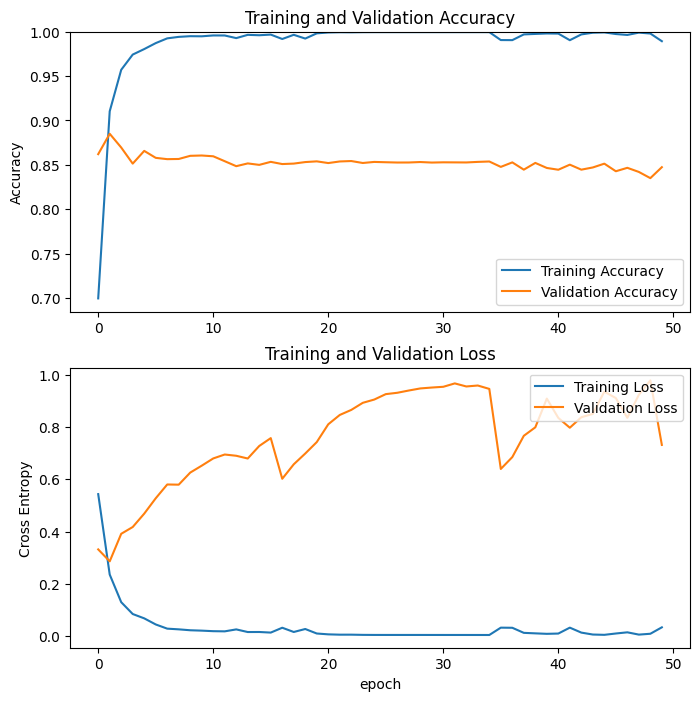

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()